In [1]:
# ----------------------------------------------------------------------------
# [Python-3.12] basic import for system check
# ----------------------------------------------------------------------------
import os
import sys
import time
import requests
import multiprocessing
import multiprocess
from collections import defaultdict
from functools import cache
from pathlib import Path
from glob import glob
# ----------------------------------------------------------------------------
# [Scikit-learn] test code
# ----------------------------------------------------------------------------
try:
    import matplotlib
    MATPLOTLIB_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package matplotlib is not installed on your system, verify or install\n")
    MATPLOTLIB_AVAILABLE = False
try:
    import tqdm
    TQDM_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package tqdm is not installed on your system, verify or install\n")
    TQDM_AVAILABLE = False
try:
    import pandas
    PANDAS_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package pandas is not installed on your system, verify or install\n")
    PANDAS_AVAILABLE = False
try:
    import seaborn
    SEABORN_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package seaborn is not installed on your system, verify or install\n")
    SEABORN_AVAILABLE = False
try:
    import torch
    TORCH_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package torch is not installed on your system, verify or install\n")
    TORCH_AVAILABLE = False
try:
    import cirq
    CIRQ_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package cirq is not installed on your system, verify or install\n")
    CIRQ_AVAILABLE = False
try:
    import qiskit
    QISKIT_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package qiskit is not installed on your system, verify or install\n")
    QISKIT_AVAILABLE = False
try:
    import sklearn
    SKLEARN_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package sklearn is not installed on your system, verify or install\n")
    SKLEARN_AVAILABLE = False
try:
    import sklearn.manifold
    SKLEARN_MANIFOLD_AVAILABLE = True
except (ImportError, NameError, AttributeError, OSError):
    print(" Python package sklearn.manifold is not installed on your system, verify or install\n")
    SKLEARN_MANIFOLD_AVAILABLE = False

print("\n")
print("SKLEARN_AVAILABLE          --->: ", SKLEARN_AVAILABLE)
print("SKLEARN_MANIFOLD_AVAILABLE --->: ", SKLEARN_MANIFOLD_AVAILABLE)
print("MATPLOTLIB_AVAILABLE       --->: ", MATPLOTLIB_AVAILABLE)
print("TQDN_AVAILABLE             --->: ", TQDM_AVAILABLE)
print("PANDAS_AVAILABLE           --->: ", PANDAS_AVAILABLE)
print("SEABORN_AVAILABLE          --->: ", SEABORN_AVAILABLE)
print("TORCH_AVAILABLE            --->: ", TORCH_AVAILABLE)
print("CIRQ_AVAILABLE             --->: ", CIRQ_AVAILABLE)
print("QISKIT_AVAILABLE           --->: ", QISKIT_AVAILABLE)
print("\n")
# ----------------------------------------------------------------------------
# [Scikit-learn] test code
# ----------------------------------------------------------------------------
from sklearn.manifold import LocallyLinearEmbedding
lle= LocallyLinearEmbedding(n_neighbors=5, n_components=2)
from sklearn.datasets import make_swiss_roll
X, t = make_swiss_roll(noise=0.05, random_state=0)
print("X.shape --->: ",X.shape)
print("t.shape --->: ",t.shape)
X_transformed=lle.fit_transform(X)
# ----------------------------------------------------------------------------
# [Start-Main]
# ----------------------------------------------------------------------------
print ("Hello jupyter notebook\n")
print ("Package loading testing on local machine....\n")



SKLEARN_AVAILABLE          --->:  True
SKLEARN_MANIFOLD_AVAILABLE --->:  True
MATPLOTLIB_AVAILABLE       --->:  True
TQDN_AVAILABLE             --->:  True
PANDAS_AVAILABLE           --->:  True
SEABORN_AVAILABLE          --->:  True
TORCH_AVAILABLE            --->:  True
CIRQ_AVAILABLE             --->:  True
QISKIT_AVAILABLE           --->:  True


X.shape --->:  (100, 3)
t.shape --->:  (100,)
Hello jupyter notebook

Package loading testing on local machine....



t-SNE: 14 sec
PCA: 0.003 sec


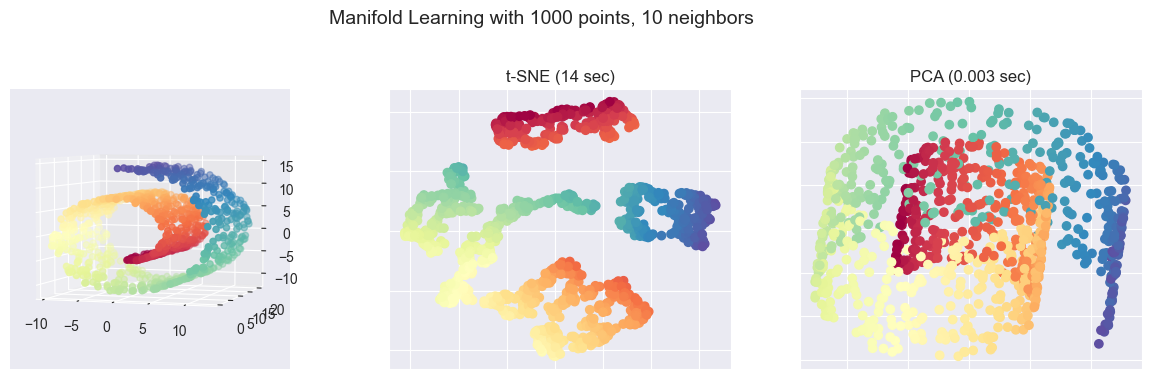

In [2]:
#Importing the required libraries
from collections import OrderedDict
from functools import partial
from time import time
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import NullFormatter
from sklearn import manifold, datasets
from sklearn.decomposition import PCA
#This import is needed to silence pyflakes
Axes3D
#Then we load the swiss roll dataset
n_points = 1000
X, color = datasets.make_swiss_roll(n_points, random_state=0)
n_neighbors = 10
n_components = 2
# Creating the plot
fig = plt.figure(figsize=(15, 8))
fig.suptitle("Manifold Learning with %i points, %i neighbors"
             % (1000, n_neighbors), fontsize=14)
# Adding 3d scatter plot
ax = fig.add_subplot(231, projection='3d')
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=color, cmap=plt.cm.Spectral)
ax.view_init(4, -72)
# Making a dictionary 'methods' containing LLE, t-SNE and PCA
LLE = partial(manifold.LocallyLinearEmbedding,
              n_neighbors, n_components, eigen_solver='auto')
methods = OrderedDict()
#methods['LLE'] = LLE(method='standard')
methods['t-SNE'] = manifold.TSNE(n_components=n_components, init='pca',
                                 random_state=0)
methods['PCA']=PCA(n_components=2)
# Plotting the results
for i, (label, method) in enumerate(methods.items()):
    t0 = time()
    Y = method.fit_transform(X)
    t1 = time()
    print("%s: %.2g sec" % (label, t1 - t0))
    ax = fig.add_subplot(2, 3, 2 + i+(i>1))
    ax.scatter(Y[:, 0], Y[:, 1], c=color, cmap=plt.cm.Spectral)
    ax.set_title("%s (%.2g sec)" % (label, t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis('tight')
plt.show()